In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense, Dropout
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import yfinance as yf

In [ ]:
start_date = '2019-03-01'
end_date = '2023-06-01'
df = yf.download('AAPL', start=start_date, end=end_date)
og_data = df

#Average Directonal Index(ADX)

n = 14
df['TR'] = np.maximum(np.maximum(df['High'] - df['Low'], abs(df['High'] - df['Close'].shift())), abs(df['Low'] - df['Close'].shift()))
df['DMplus'] = np.where((df['High'] - df['High'].shift()) > (df['Low'].shift() - df['Low']), np.maximum(df['High'] - df['High'].shift(), 0), 0)
df['DMminus'] = np.where((df['Low'].shift() - df['Low']) > (df['High'] - df['High'].shift()), np.maximum(df['Low'].shift() - df['Low'], 0), 0)
ATR = df['TR'].rolling(n).mean()
DMplus = df['DMplus'].rolling(n).mean()
DMminus = df['DMminus'].rolling(n).mean()
DIplus = DMplus / ATR * 100
DIminus = DMminus / ATR * 100
df['DIplus'] = DIplus
df['DIminus'] = DIminus
DX = abs(DIplus - DIminus) / (DIplus + DIminus) * 100
adx = DX.rolling(n).mean()

df = df.assign(ADX = adx)

df = df.drop(['TR','DMplus','DMminus','Adj Close','DIplus','DIminus'],axis=1)

df = df.rename(columns={'Close':'price'})

print(df)

[*********************100%***********************]  1 of 1 completed
                  Open        High         Low       price     Volume  \
Date                                                                    
2019-03-01   43.570000   43.787498   43.222500   43.742500  103544800   
2019-03-04   43.922501   44.437500   43.492500   43.962502  109744800   
2019-03-05   43.985001   44.000000   43.634998   43.882500   78949600   
2019-03-06   43.667500   43.872501   43.485001   43.630001   83241600   
2019-03-07   43.467499   43.610001   43.005001   43.125000   99185600   
...                ...         ...         ...         ...        ...   
2023-05-24  171.089996  172.419998  170.520004  171.839996   45143500   
2023-05-25  172.410004  173.899994  171.690002  172.990005   56058300   
2023-05-26  173.320007  175.770004  173.110001  175.429993   54835000   
2023-05-30  176.960007  178.990005  176.570007  177.300003   55964400   
2023-05-31  177.330002  179.350006  176.759995  177.250

In [ ]:
##MACD

data = og_data
data['26_ema'] = data['Close'].ewm(span=26).mean()
data['12_ema'] = data['Close'].ewm(span=12).mean()
data['MACD'] = data['12_ema'] - data['26_ema']
data['signal_line'] = data['MACD'].ewm(span=9).mean()

print(data[['MACD', 'signal_line']])

                MACD  signal_line
Date                             
2019-03-01  0.000000     0.000000
2019-03-04  0.004936     0.002742
2019-03-05  0.003808     0.003179
2019-03-06 -0.005914     0.000099
2019-03-07 -0.031168    -0.009202
...              ...          ...
2023-05-24  2.286543     2.695977
2023-05-25  2.163086     2.589399
2023-05-26  2.236352     2.518789
2023-05-30  2.417443     2.498520
2023-05-31  2.527785     2.504373

[1071 rows x 2 columns]


In [ ]:
MACD = data.loc[:,'MACD']
df.insert(3,'MACD',MACD,True)
print(df)

                  Open        High         Low      MACD       price  \
Date                                                                   
2019-03-01   43.570000   43.787498   43.222500  0.000000   43.742500   
2019-03-04   43.922501   44.437500   43.492500  0.004936   43.962502   
2019-03-05   43.985001   44.000000   43.634998  0.003808   43.882500   
2019-03-06   43.667500   43.872501   43.485001 -0.005914   43.630001   
2019-03-07   43.467499   43.610001   43.005001 -0.031168   43.125000   
...                ...         ...         ...       ...         ...   
2023-05-24  171.089996  172.419998  170.520004  2.286543  171.839996   
2023-05-25  172.410004  173.899994  171.690002  2.163086  172.990005   
2023-05-26  173.320007  175.770004  173.110001  2.236352  175.429993   
2023-05-30  176.960007  178.990005  176.570007  2.417443  177.300003   
2023-05-31  177.330002  179.350006  176.759995  2.527785  177.250000   

               Volume        ADX  
Date                        

In [ ]:
#Average True Range (ATR)

data['High-Low'] = data['High'] - data['Low']
data['High-PrevClose'] = abs(data['High'] - data['Close'].shift(1))
data['Low-PrevClose'] = abs(data['Low'] - data['Close'].shift(1))
data['TR'] = data[['High-Low', 'High-PrevClose', 'Low-PrevClose']].max(axis=1)

period = 14
data['ATR'] = data['TR'].rolling(period).mean()
mm = data['ATR']

print(data[['ATR']])

                 ATR
Date                
2019-03-01       NaN
2019-03-04       NaN
2019-03-05       NaN
2019-03-06       NaN
2019-03-07       NaN
...              ...
2023-05-24  2.582856
2023-05-25  2.132855
2023-05-26  2.207140
2023-05-30  2.322856
2023-05-31  2.346429

[1071 rows x 1 columns]


In [ ]:
df.insert(4,'ATR',mm,True)
print(df)

                  Open        High         Low      MACD       ATR  \
Date                                                                 
2019-03-01   43.570000   43.787498   43.222500  0.000000       NaN   
2019-03-04   43.922501   44.437500   43.492500  0.004936       NaN   
2019-03-05   43.985001   44.000000   43.634998  0.003808       NaN   
2019-03-06   43.667500   43.872501   43.485001 -0.005914       NaN   
2019-03-07   43.467499   43.610001   43.005001 -0.031168       NaN   
...                ...         ...         ...       ...       ...   
2023-05-24  171.089996  172.419998  170.520004  2.286543  2.582856   
2023-05-25  172.410004  173.899994  171.690002  2.163086  2.132855   
2023-05-26  173.320007  175.770004  173.110001  2.236352  2.207140   
2023-05-30  176.960007  178.990005  176.570007  2.417443  2.322856   
2023-05-31  177.330002  179.350006  176.759995  2.527785  2.346429   

                 price     Volume        ADX  
Date                                      

In [ ]:
#Accumulation and Distribution Indicator (ADL)

data['MF Multiplier'] = ((data['Close'] - data['Low']) - (data['High'] - data['Close'])) / (data['High'] - data['Low'])
data['MF Volume'] = data['MF Multiplier'] * data['Volume']
data['ADL'] = data['MF Volume'].cumsum()

nn = data['ADL']

print(data[['ADL']])

                     ADL
Date                    
2019-03-01  8.705157e+07
2019-03-04  8.647123e+07
2019-03-05  1.145904e+08
2019-03-06  9.364578e+07
2019-03-07  3.380621e+07
...                  ...
2023-05-24  6.945625e+09
2023-05-25  6.955518e+09
2023-05-26  6.996335e+09
2023-05-30  6.974134e+09
2023-05-31  6.912205e+09

[1071 rows x 1 columns]


In [ ]:
df.insert(5,'ADL',nn,True)
print(df)

                  Open        High         Low      MACD       ATR  \
Date                                                                 
2019-03-01   43.570000   43.787498   43.222500  0.000000       NaN   
2019-03-04   43.922501   44.437500   43.492500  0.004936       NaN   
2019-03-05   43.985001   44.000000   43.634998  0.003808       NaN   
2019-03-06   43.667500   43.872501   43.485001 -0.005914       NaN   
2019-03-07   43.467499   43.610001   43.005001 -0.031168       NaN   
...                ...         ...         ...       ...       ...   
2023-05-24  171.089996  172.419998  170.520004  2.286543  2.582856   
2023-05-25  172.410004  173.899994  171.690002  2.163086  2.132855   
2023-05-26  173.320007  175.770004  173.110001  2.236352  2.207140   
2023-05-30  176.960007  178.990005  176.570007  2.417443  2.322856   
2023-05-31  177.330002  179.350006  176.759995  2.527785  2.346429   

                     ADL       price     Volume        ADX  
Date                        

In [ ]:
new_cols = ['Volume','Open','High','Low','ADX','MACD','ATR','ADL','price']
df = df[new_cols]
df = df.iloc[64:]
df.to_csv("indicators.csv")
print(df)

               Volume        Open        High         Low        ADX  \
Date                                                                   
2019-06-03  161584400   43.900002   44.480000   42.567501  55.904681   
2019-06-04  123872000   43.860001   44.957500   43.630001  55.367412   
2019-06-05  119093600   46.070000   46.247501   45.285000  54.539330   
2019-06-06   90105200   45.770000   46.367500   45.537498  54.165522   
2019-06-07  122737600   46.627499   47.980000   46.442501  51.724354   
...               ...         ...         ...         ...        ...   
2023-05-24   45143500  171.089996  172.419998  170.520004  31.282786   
2023-05-25   56058300  172.410004  173.899994  171.690002  28.993065   
2023-05-26   54835000  173.320007  175.770004  173.110001  26.480823   
2023-05-30   55964400  176.960007  178.990005  176.570007  25.820311   
2023-05-31   99625300  177.330002  179.350006  176.759995  25.007858   

                MACD       ATR           ADL       price  
Date

In [ ]:
df = pd.read_csv('indicators.csv')
print(df)
df=df.head(757)     

            Date     Volume        Open        High         Low        ADX  \
0     2019-06-03  161584400   43.900002   44.480000   42.567501  55.904681   
1     2019-06-04  123872000   43.860001   44.957500   43.630001  55.367412   
2     2019-06-05  119093600   46.070000   46.247501   45.285000  54.539330   
3     2019-06-06   90105200   45.770000   46.367500   45.537498  54.165522   
4     2019-06-07  122737600   46.627499   47.980000   46.442501  51.724354   
...          ...        ...         ...         ...         ...        ...   
1002  2023-05-24   45143500  171.089996  172.419998  170.520004  31.282786   
1003  2023-05-25   56058300  172.410004  173.899994  171.690002  28.993065   
1004  2023-05-26   54835000  173.320007  175.770004  173.110001  26.480823   
1005  2023-05-30   55964400  176.960007  178.990005  176.570007  25.820311   
1006  2023-05-31   99625300  177.330002  179.350006  176.759995  25.007858   

          MACD       ATR           ADL       price  
0    -1.57

In [ ]:
cols = list(df)[1:10]
print(cols)

['Volume', 'Open', 'High', 'Low', 'ADX', 'MACD', 'ATR', 'ADL', 'price']


In [ ]:
df_for_training = df[cols].astype(float)

In [ ]:
scaler = StandardScaler()
scaler = scaler.fit(df_for_training)
df_for_training_scaled = scaler.transform(df_for_training)

In [ ]:
trainX = []
trainY = []

In [ ]:
n_future = 1   # Number of days we want to look into the future based on the past days.
n_past = 14    # Number of past days we want to use to predict the future.

In [ ]:
for i in range(n_past, len(df_for_training_scaled) - n_future +1):
    trainX.append(df_for_training_scaled[i - n_past:i, 0:df_for_training.shape[1]])
    trainY.append(df_for_training_scaled[i + n_future - 1:i + n_future, 8])

trainX, trainY = np.array(trainX), np.array(trainY)

print('trainX shape == {}.'.format(trainX.shape))
print('trainY shape == {}.'.format(trainY.shape))

trainX shape == (743, 14, 9).
trainY shape == (743, 1).


In [ ]:
df_for_training_scaled

array([[ 0.80306198, -1.71634224, -1.71686013, ..., -1.23731166,
        -1.8234443 , -1.73410676],
       [ 0.13068949, -1.7173453 , -1.70501921, ..., -1.20979552,
        -1.75202375, -1.69433233],
       [ 0.04549563, -1.6619274 , -1.67303015, ..., -1.2144633 ,
        -1.77219449, -1.67613901],
       ...,
       [-0.45576708,  0.82861918,  0.89185792, ...,  2.18954562,
         1.25737587,  0.9337928 ],
       [-0.22862804,  0.920899  ,  0.91615994, ...,  2.14728877,
         1.26041077,  0.91371729],
       [-0.75336613,  0.94171173,  0.9429415 , ...,  1.87311147,
         1.23768557,  0.91045529]])

In [ ]:
trainY

array([[-1.57425615],
       [-1.57551085],
       [-1.59439427],
       [-1.56785708],
       [-1.56823348],
       [-1.57965143],
       [-1.55687833],
       [-1.54947556],
       [-1.53893591],
       [-1.5400652 ],
       [-1.56647689],
       [-1.55882312],
       [-1.54633877],
       [-1.55562363],
       [-1.54589957],
       [-1.53391703],
       [-1.53837131],
       [-1.54558588],
       [-1.53109394],
       [-1.55035385],
       [-1.52130718],
       [-1.51114402],
       [-1.51221052],
       [-1.52256188],
       [-1.5180449 ],
       [-1.50587425],
       [-1.51152042],
       [-1.48479504],
       [-1.51371621],
       [-1.54138259],
       [-1.6083844 ],
       [-1.5854231 ],
       [-1.57262506],
       [-1.54508408],
       [-1.56039151],
       [-1.5635911 ],
       [-1.51032843],
       [-1.54935006],
       [-1.55568633],
       [-1.52582416],
       [-1.50167087],
       [-1.50160817],
       [-1.48730443],
       [-1.48843362],
       [-1.55004016],
       [-1

In [ ]:
model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True)) 
model.add(LSTM(32, activation='relu', return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(trainY.shape[1]))

model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 14, 64)            18944     
                                                                 
 lstm_1 (LSTM)               (None, 32)                12416     
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 31,393
Trainable params: 31,393
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(trainX, trainY, epochs=5, batch_size=3, validation_split=0.1, verbose=1)

Epoch 1/5
223/223 [==============================] - 13s 32ms/step - loss: 0.1380 - val_loss: 0.0346
Epoch 2/5
223/223 [==============================] - 8s 35ms/step - loss: 0.0610 - val_loss: 0.0333
Epoch 3/5
223/223 [==============================] - 5s 24ms/step - loss: 0.0432 - val_loss: 0.0253
Epoch 4/5
223/223 [==============================] - 3s 12ms/step - loss: 0.0432 - val_loss: 0.0328
Epoch 5/5
223/223 [==============================] - 6s 28ms/step - loss: 0.0402 - val_loss: 0.0326


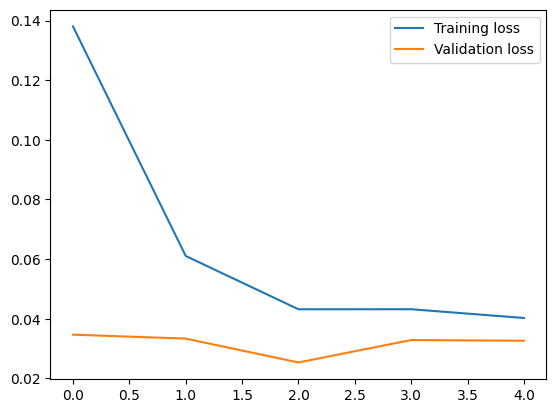

In [ ]:
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()

In [ ]:
from pandas.tseries.holiday import USFederalHolidayCalendar
from pandas.tseries.offsets import CustomBusinessDay
us_bd = CustomBusinessDay(calendar=USFederalHolidayCalendar())

In [ ]:
df2= df.head(1006)
train_dates = pd.to_datetime(df2['Date'])
print(train_dates.tail(15)) 
print(train_dates.shape[0])

742   2022-05-11
743   2022-05-12
744   2022-05-13
745   2022-05-16
746   2022-05-17
747   2022-05-18
748   2022-05-19
749   2022-05-20
750   2022-05-23
751   2022-05-24
752   2022-05-25
753   2022-05-26
754   2022-05-27
755   2022-05-31
756   2022-06-01
Name: Date, dtype: datetime64[ns]
757


In [ ]:
n_past = 1
n_days_for_prediction=366

predict_period_dates = pd.date_range(list(train_dates)[-n_past], periods=n_days_for_prediction, freq='D').tolist()
print(predict_period_dates)

[Timestamp('2022-06-01 00:00:00', freq='D'), Timestamp('2022-06-02 00:00:00', freq='D'), Timestamp('2022-06-03 00:00:00', freq='D'), Timestamp('2022-06-04 00:00:00', freq='D'), Timestamp('2022-06-05 00:00:00', freq='D'), Timestamp('2022-06-06 00:00:00', freq='D'), Timestamp('2022-06-07 00:00:00', freq='D'), Timestamp('2022-06-08 00:00:00', freq='D'), Timestamp('2022-06-09 00:00:00', freq='D'), Timestamp('2022-06-10 00:00:00', freq='D'), Timestamp('2022-06-11 00:00:00', freq='D'), Timestamp('2022-06-12 00:00:00', freq='D'), Timestamp('2022-06-13 00:00:00', freq='D'), Timestamp('2022-06-14 00:00:00', freq='D'), Timestamp('2022-06-15 00:00:00', freq='D'), Timestamp('2022-06-16 00:00:00', freq='D'), Timestamp('2022-06-17 00:00:00', freq='D'), Timestamp('2022-06-18 00:00:00', freq='D'), Timestamp('2022-06-19 00:00:00', freq='D'), Timestamp('2022-06-20 00:00:00', freq='D'), Timestamp('2022-06-21 00:00:00', freq='D'), Timestamp('2022-06-22 00:00:00', freq='D'), Timestamp('2022-06-23 00:00:00'

In [ ]:
prediction = model.predict(trainX[-n_days_for_prediction:]) 

12/12 [==============================] - 0s 4ms/step


In [ ]:
prediction_copies = np.repeat(prediction, df_for_training.shape[1], axis=-1)
y_pred_future = scaler.inverse_transform(prediction_copies)[:,8]

In [ ]:
forecast_dates = []
for time_i in predict_period_dates:
    forecast_dates.append(time_i.date())
    
df_forecast = pd.DataFrame({'Date':np.array(forecast_dates), 'price':y_pred_future})
df_forecast['Date']=pd.to_datetime(df_forecast['Date'])

In [ ]:
original = df[['Date', 'price']]
original['Date']=pd.to_datetime(original['Date'])
original


<ipython-input-28-20f60c629b61>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  original['Date']=pd.to_datetime(original['Date'])


,Date,price
0,2019-06-03,43.325001
1,2019-06-04,44.910000
2,2019-06-05,45.634998
3,2019-06-06,46.305000
4,2019-06-07,47.537498
...,...,...
752,2022-05-25,140.520004
753,2022-05-26,143.779999
754,2022-05-27,149.639999
755,2022-05-31,148.839996


In [ ]:
df_forecast

,Date,price
0,2022-06-01,130.441833
1,2022-06-02,130.676010
2,2022-06-03,131.270706
3,2022-06-04,131.368149
4,2022-06-05,131.451920
...,...,...
361,2023-05-28,145.042099
362,2023-05-29,144.026871
363,2023-05-30,143.392075
364,2023-05-31,143.847061


<Axes: xlabel='Date'>

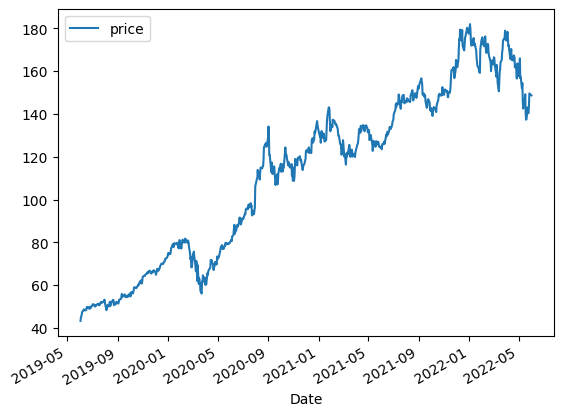

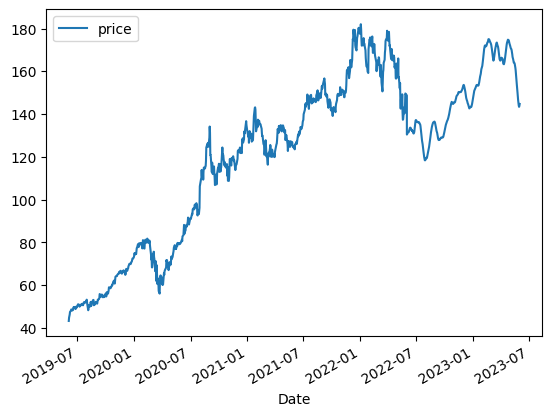

In [ ]:
original.plot(x='Date',y='price')
original= pd.concat([original,df_forecast],axis=0)
original.plot(x='Date',y='price')

In [ ]:
predicted = df_forecast
temp_df = pd.read_csv('indicators.csv')['Date'].values[756:1008]
print(len(predicted)-len(temp_df))
for i in predicted.index:
  tmp = str(predicted['Date'][i]).replace('T00:00:00.000000000','').replace(' 00:00:00', '')
  if tmp not in temp_df:
    predicted.drop(df.index[i:i+1], inplace=True)
print(len(predicted)-len(temp_df))
predicted.to_csv("predict.csv")

115
0


In [ ]:
OGates = pd.read_csv('indicators.csv')['Date']
west = predicted.iloc[:,0]
print(OGates)

0       2019-06-03
1       2019-06-04
2       2019-06-05
3       2019-06-06
4       2019-06-07
           ...    
1002    2023-05-24
1003    2023-05-25
1004    2023-05-26
1005    2023-05-30
1006    2023-05-31
Name: Date, Length: 1007, dtype: object


In [ ]:
predicted_values = predicted.loc[:,"price"]

In [ ]:
predicted_values = predicted_values.tolist()

print(predicted_values)     

[130.44183349609375, 130.67601013183594, 131.2707061767578, 131.46466064453125, 131.61924743652344, 132.10546875, 132.63279724121094, 133.24468994140625, 133.47779846191406, 133.4208526611328, 132.88433837890625, 132.40377807617188, 132.56947326660156, 131.3122100830078, 131.0211944580078, 130.91952514648438, 131.1669464111328, 134.30465698242188, 135.9290313720703, 136.8621063232422, 137.2271728515625, 137.137939453125, 136.26458740234375, 136.1904296875, 136.22280883789062, 136.2251739501953, 136.0113525390625, 135.74693298339844, 135.3507080078125, 135.2157440185547, 134.43844604492188, 130.44097900390625, 128.79714965820312, 127.6472396850586, 126.81282043457031, 125.89904022216797, 122.18842315673828, 120.99832153320312, 119.94447326660156, 119.07378387451172, 118.43940734863281, 119.1167221069336, 119.57292175292969, 119.44438171386719, 119.32861328125, 119.6238784790039, 121.69823455810547, 122.50230407714844, 123.20285034179688, 123.86347198486328, 124.78154754638672, 127.95403

In [ ]:
a = pd.read_csv('indicators.csv')
east = a.iloc[:,0]

In [ ]:
actual = a.loc[:,"price"].values[756:1008]
actual_values = actual.tolist()
print(actual_values)
print(len(actual_values))

[148.7100067138672, 151.2100067138672, 145.3800048828125, 146.13999938964844, 148.7100067138672, 147.9600067138672, 142.63999938964844, 137.1300048828125, 131.8800048828125, 132.75999450683594, 135.42999267578125, 130.05999755859375, 131.55999755859375, 135.8699951171875, 135.35000610351562, 138.27000427246094, 141.66000366210938, 141.66000366210938, 137.44000244140625, 139.22999572753906, 136.72000122070312, 138.92999267578125, 141.55999755859375, 142.9199981689453, 146.35000610351562, 147.0399932861328, 144.8699951171875, 145.86000061035156, 145.49000549316406, 148.47000122070312, 150.1699981689453, 147.07000732421875, 151.0, 153.0399932861328, 155.35000610351562, 154.08999633789062, 152.9499969482422, 151.60000610351562, 156.7899932861328, 157.35000610351562, 162.50999450683594, 161.50999450683594, 160.00999450683594, 166.1300048828125, 165.80999755859375, 165.35000610351562, 164.8699951171875, 164.9199981689453, 169.24000549316406, 168.49000549316406, 172.10000610351562, 173.190002

In [ ]:
l=len(actual_values)
efficiency=[]
for i in range(0,l):
  e=100-((abs(actual_values[i]-predicted_values[i]))/actual_values[i])*100
  efficiency.append(e)
print(efficiency)

[87.71557232666716, 86.42021316691859, 90.29488359322325, 89.9580273666289, 88.50732398242167, 89.28457877504188, 92.98429459390215, 97.16669233350751, 98.78844895363679, 99.50221589210533, 98.12031718633457, 98.19792360327992, 99.2326879547423, 96.64548082875207, 96.80176472086958, 94.6839669495544, 92.59278767491433, 94.80774637191763, 98.9006322449826, 98.29929650437494, 99.62904357348515, 98.71010342105298, 96.25924678752686, 95.29137379816483, 93.08015248153671, 92.64498107335167, 93.88510880326936, 93.06659290783287, 93.03093195234777, 91.07277086739848, 89.52417106223507, 88.69312062815536, 85.29612560145902, 83.40776612973421, 81.63039295284617, 81.70487586104866, 79.88782320674807, 79.81419304863547, 76.50008189470978, 75.67447045167371, 72.88130659782324, 73.7519201029333, 74.72840813566886, 71.89813892928181, 71.9670798131951, 72.3458567059953, 73.81466498595084, 74.27983594303471, 72.79771114565065, 73.51383936531988, 72.50525457351375, 73.88072700168632, 74.62636998846706,

In [ ]:
avg = np.average(efficiency)
print(avg)

90.26194970294677
